In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pickle
import sys
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


modules_route = str(os.getcwd()).replace("\\", "/")+"/Modules/"
sys.path.insert(0, modules_route)

import WavePlotter as wp


In [6]:
plotters = os.listdir(os.getcwd()+'/Data/plotdata')
plotters

['airborne.txt',
 'air_conditioner.txt',
 'alarm.txt',
 'bells.txt',
 'bird.txt',
 'braking.txt',
 'bus_idling.txt',
 'bus_moving.txt',
 'car_idling.txt',
 'car_moving.txt',
 'crowd.txt',
 'cutting.txt',
 'dog.txt',
 'drilling.txt',
 'explosives.txt',
 'fireworks.txt',
 'horn.txt',
 'impact.txt',
 'motorcycle_idling.txt',
 'motorcycle_moving.txt',
 'music.txt',
 'shouting.txt',
 'siren.txt',
 'steps.txt',
 'talk.txt',
 'water.txt']

In [7]:
datas = []
for t in plotters:
    with open(os.getcwd()+'/Data/plotdata/' + t, "rb") as f:
        datas.append(pickle.load(f))

df = pd.DataFrame(columns = ['station', 'X [frequency]', 'Y [psd]', 'label' ])

for i in range(len(datas)):
    df = df.append(datas[i])
    
df = df.reset_index()

for i in range(len(df)):
    
    if (df.at[i, 'station'] == 'vit_global'):
        
        df.at[i, 'Y [psd]'] = np.mean(df.at[i, 'Y [psd]'], axis = 1)
        
    df.at[i, 'Y [psd]'] = df.at[i, 'Y [psd]'].flatten()

df.pop('index')
    
df

,station,X [frequency],Y [psd],label
0,capta_002,"[0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16...","[-30.510592, -26.386011, -26.29007, -26.47629,...",airborne
1,campus_miraflores,"[0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16...","[-34.239758, -25.954147, -22.232414, -22.25546...",airborne
2,capta_004,"[0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16...","[-38.910637, -34.479397, -32.158936, -30.31726...",airborne
3,capta_003,"[0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16...","[-35.488373, -38.43441, -47.148575, -42.87484,...",airborne
4,mma,"[0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16...","[-25.64884, -19.783684, -17.31609, -16.476799,...",airborne
...,...,...,...,...
138,control_acustico,"[0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16...","[-23.383844, -16.25587, -12.790388, -12.910527...",talk
139,vit_global,"[0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16...","[-14.588615, -9.436196, -12.369392, -15.555002...",talk
140,capta_002,"[0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16...","[-28.909582, -23.986877, -23.221636, -22.89333...",water
141,capta_003,"[0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16...","[-37.006374, -38.306538, -32.15228, -31.067917...",water


In [8]:
df.loc[df['label'] == 'car_moving']

,station,X [frequency],Y [psd],label
51,capta_002,"[0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16...","[-24.44536, -18.838314, -16.853281, -15.851004...",car_moving
52,campus_miraflores,"[0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16...","[-34.09355, -34.657787, -36.26108, -33.161823,...",car_moving
53,capta_004,"[0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16...","[-32.420013, -32.235405, -33.92353, -31.565292...",car_moving
54,capta_003,"[0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16...","[-33.8996, -34.40888, -37.908066, -33.84279, -...",car_moving
55,mma,"[0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16...","[-28.827023, -24.388367, -22.732286, -21.46913...",car_moving
56,control_acustico,"[0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16...","[-27.966509, -22.472233, -19.216309, -18.16437...",car_moving
57,vit_global,"[0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16...","[-17.279137, -10.007471, -11.914288, -15.18454...",car_moving


In [9]:
df['label'].unique()

array(['airborne', 'air_conditioner', 'braking', 'bells', 'bird',
       'bus_idling', 'bus_moving', 'car_idling', 'car_moving', 'crowd',
       'cutting', 'dog', 'drilling', 'explosives', 'fireworks', 'horn',
       'impact', 'motorcycle_idling', 'motorcycle_moving', 'music',
       'shouting', 'siren', 'steps', 'talk', 'water'], dtype=object)

In [220]:
df['station'].unique()

array(['capta_002', 'campus_miraflores', 'capta_004', 'capta_003', 'mma',
       'control_acustico', 'vit_global'], dtype=object)

In [59]:
wavs = os.listdir(os.getcwd()+'/Audios/noise')

wavs = pd.DataFrame(wavs, columns=['filename'])
wavs.to_csv('wavlist_noise.txt', sep=' ', index=False)

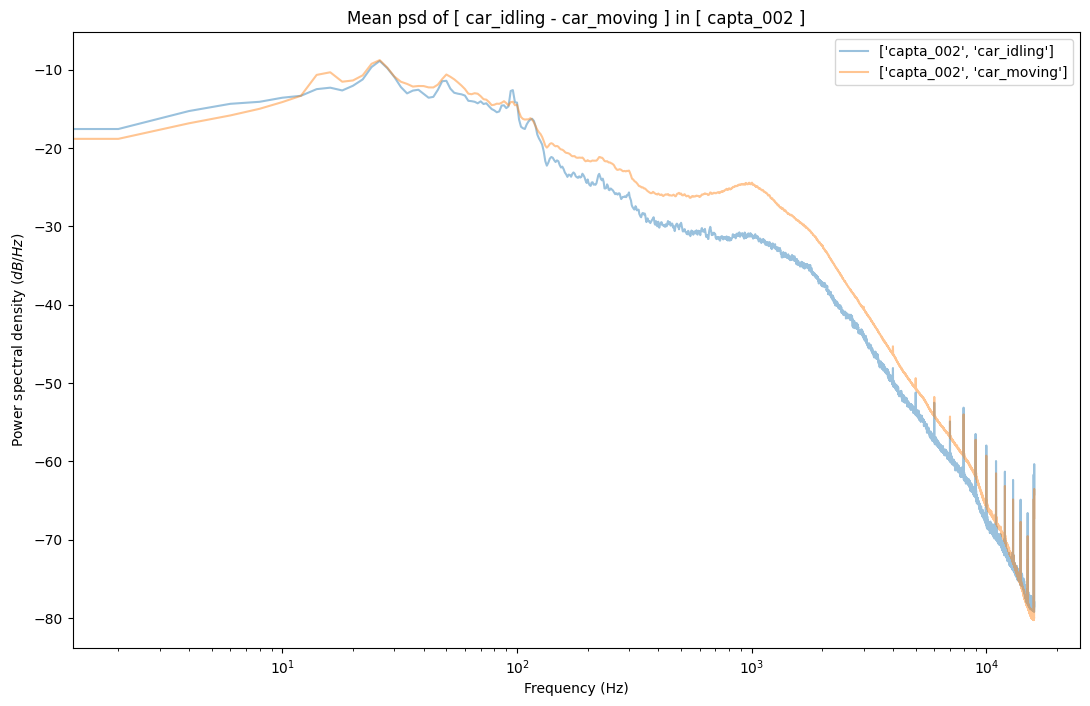

In [10]:
wp.PSD_plot(df = df, station = ['capta_002'], label = ['car_idling', 'car_moving'])

In [3]:
a_plot = wp.WavePlot()

Selection: Z:/Proyectos/fusa-training/Data/Threshold_05/bird.txt


In [5]:
colormap = {'capta_002' : 'sienna',
            'capta_003' : 'g', 
            'capta_004' : 'r', 
            'campus_miraflores' : 'c', 
            'mma' : 'y',
            'control_acustico' : 'navy', 
            'vit_global' : 'olive'}

Working at: Z:/Proyectos/fusa-training/Audios/bird
ERUIDO2022_20211220211628_bird_36632.wav
2801 / 2801


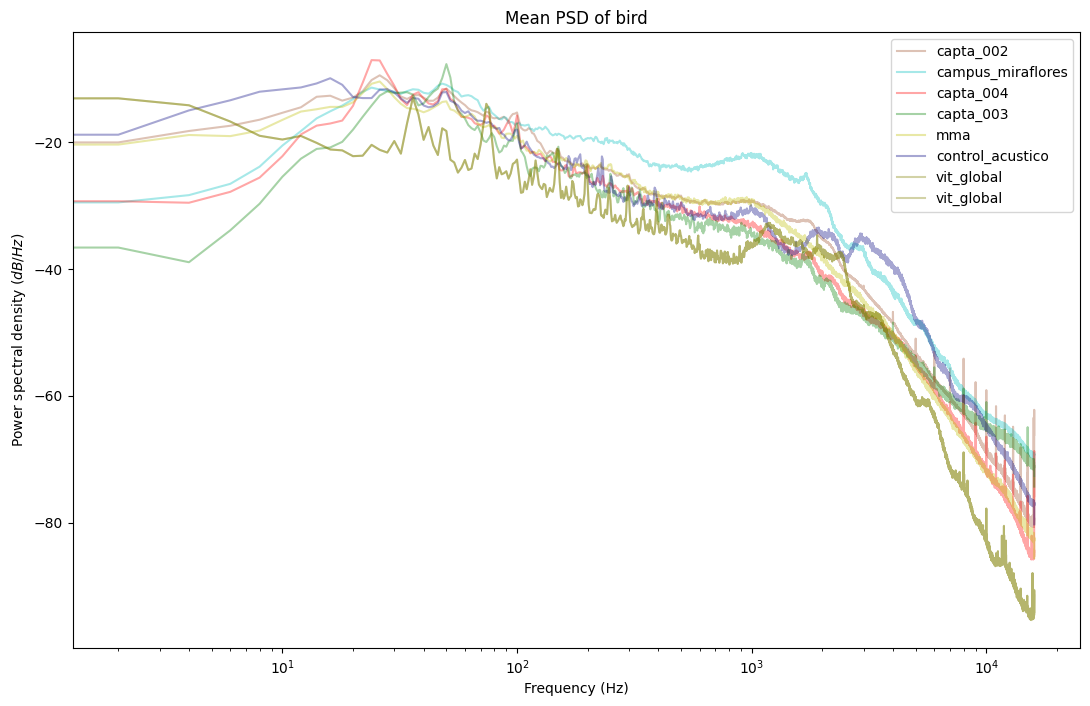

In [6]:
# # fig, ax = plt.subplots()
# # ax1 = bells.Mean_Power_Spectral_Density(color = colormap)

a_plot.Mean_Power_Spectral_Density(color = colormap)

In [7]:
with open(os.getcwd()+'/Data/plotdata/bird.txt', "wb") as f:
    pickle.dump(a_plot.plotdata, f)

In [3]:
plotters = os.listdir(os.getcwd()+'/Data/plotdata')
plotters

['airborne.txt',
 'air_conditioner.txt',
 'alarm.txt',
 'bells.txt',
 'bird.txt',
 'braking.txt',
 'bus_idling.txt',
 'bus_moving.txt',
 'car_idling.txt',
 'crowd.txt',
 'cutting.txt',
 'dog.txt',
 'drilling.txt',
 'explosives.txt',
 'fireworks.txt',
 'horn.txt',
 'impact.txt',
 'motorcycle_idling.txt',
 'motorcycle_moving.txt',
 'music.txt',
 'shouting.txt',
 'siren.txt',
 'steps.txt',
 'talk.txt',
 'water.txt']

In [6]:
columns = ['Label', 'station','Label Counts','Total Label Time [s]', 'Mean Duration per Label [s]']
rows = []

In [5]:
filename = os.getcwd()+'/Data/Threshold_05/'+'bus_moving.txt'
filename2 = os.getcwd()+'/Data/Threshold_05/'+'steps.txt'

daf = pd.read_csv(filename, sep=' ')
daf2 = pd.read_csv(filename2, sep=' ')
daf['counts'] = 1
daf = daf.drop(['power', 'original wav', 'filename'], axis = 1)
daf['mean duration per event'] = round(daf['duration'] / len(daf.loc[daf['label'] == 'bus_moving']), 2)
daf['duration'] = round(daf['duration'], 1)

daf2['counts'] = 1
daf2['counts'] = 1
daf2 = daf2.drop(['power', 'original wav', 'filename'], axis = 1)
daf2['mean duration per event'] = round(daf2['duration'] / len(daf2.loc[daf2['label'] == 'steps']), 2)
daf2['duration'] = round(daf2['duration'], 1)


In [161]:
a = daf.groupby(['label', 'station']).sum()
a = a.append(daf2.groupby(['label', 'station']).sum())
a

duration  counts  mean duration per event
label      station                                                     
bus_moving campus_miraflores     302.3      33                     0.49
           capta_002            4120.7     329                     6.40
           capta_003             470.6      52                     0.76
           capta_004            1796.6     169                     2.84
           control_acustico      111.3      12                     0.18
           mma                   199.7      22                     0.35
           vit_global            103.4      17                     0.15
steps      campus_miraflores       6.7       2                     0.08
           capta_002             193.8      31                     2.11
           capta_003             162.2      47                     1.78
           capta_004              19.3       7                     0.22
           control_acustico        9.6       4                     0.10
           mma                     1.2       1                     0.01

In [209]:
my_dict = {'mma' : 0,
           'capta_002' : 0,
           'capta_003' : 0,
           'capta_004' : 0,
           'control_acustico' : 0,
           'vit_global' : 0,
           'campus_miraflores' : 0
    
}

In [213]:
my_dict['mma'] += 1

In [226]:
my_dict

0

In [227]:
daf['station'][0]

'capta_004'

In [230]:
filename = os.getcwd()+'/Data/Threshold_05/air_conditioner.txt'
daf = pd.read_csv(filename, sep=' ')
len(daf.loc[daf['station'] == 'capta_004'])


# df.loc[df['mID']=='A','hID'].agg(['nunique','count','size'])

2

In [7]:
columns = []
daf = 0
readme = pd.DataFrame(columns = columns)

pd.set_option('display.max_rows', None)




for i in plotters:
    
    filename = os.getcwd()+'/Data/Threshold_05/'+i
    daf = pd.read_csv(filename, sep=' ')
    
    daf['Total Duration [s]'] = round(daf['duration'], 1)
    
    daf = daf.drop(['power', 'original wav', 'filename', 'duration'], axis = 1)
    daf['Counts'] = 1
    readme = readme.append(daf)


adde = readme.groupby(['label', 'station']).sum()
adde['Mean duration'] = round(adde['Total Duration [s]'] / adde['Counts'], 1)

print(adde.to_html())

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th></th>
      <th>Total Duration [s]</th>
      <th>Counts</th>
      <th>Mean duration</th>
    </tr>
    <tr>
      <th>label</th>
      <th>station</th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th rowspan="2" valign="top">air_conditioner</th>
      <th>capta_004</th>
      <td>25.2</td>
      <td>2</td>
      <td>12.6</td>
    </tr>
    <tr>
      <th>control_acustico</th>
      <td>10.0</td>
      <td>1</td>
      <td>10.0</td>
    </tr>
    <tr>
      <th rowspan="6" valign="top">airborne</th>
      <th>campus_miraflores</th>
      <td>36.2</td>
      <td>1</td>
      <td>36.2</td>
    </tr>
    <tr>
      <th>capta_002</th>
      <td>64.5</td>
      <td>3</td>
      <td>21.5</td>
    </tr>
    <tr>
      <th>capta_003</th>
      <td>37.8</td>
      <td>2</td>
      <td>18.9</td>
    </tr>
    <tr>
      <th>capta_004</th>

In [68]:
for i in plotters:
    filename = os.getcwd()+'/Data/Threshold_05/'+i
    daf = pd.read_csv(filename, sep=' ')
    
    
    
    label = i.replace('.txt', '')
    counts = round(len(daf), 0)
    time = round(daf['duration'].sum(), 1)
    mean_time = round(daf['duration'].sum()/len(daf), 1)
    
    rows.append([label, counts,time, mean_time])
readme = pd.DataFrame(rows,columns=columns)
readme.index += 1
readme

,Label,Label Counts,Total Label Time [s],Mean Duration per Label [s]
1,airborne,141,1514.2,10.7
2,air_conditioner,3,35.2,11.7
3,alarm,567,4163.9,7.3
4,bells,9,14.6,1.6
5,bird,2801,12513.0,4.5
6,braking,222,463.0,2.1
7,bus_idling,446,6808.8,15.3
8,bus_moving,634,7105.1,11.2
9,car_idling,196,2468.6,12.6
10,crowd,194,1962.3,10.1


In [69]:
a = readme.to_html()
print(a)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Label</th>
      <th>Label Counts</th>
      <th>Total Label Time [s]</th>
      <th>Mean Duration per Label [s]</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>airborne</td>
      <td>141</td>
      <td>1514.2</td>
      <td>10.7</td>
    </tr>
    <tr>
      <th>2</th>
      <td>air_conditioner</td>
      <td>3</td>
      <td>35.2</td>
      <td>11.7</td>
    </tr>
    <tr>
      <th>3</th>
      <td>alarm</td>
      <td>567</td>
      <td>4163.9</td>
      <td>7.3</td>
    </tr>
    <tr>
      <th>4</th>
      <td>bells</td>
      <td>9</td>
      <td>14.6</td>
      <td>1.6</td>
    </tr>
    <tr>
      <th>5</th>
      <td>bird</td>
      <td>2801</td>
      <td>12513.0</td>
      <td>4.5</td>
    </tr>
    <tr>
      <th>6</th>
      <td>braking</td>
      <td>222</td>
      <td>463.0</td>
      <td>2.1</td>
    </tr>
    <tr>
      <th>7</th>
     

In [45]:
label = 'airborne'
time = round(daf['duration'].sum()/len(daf), 1)
time

10.7